In [1]:
    %config InlineBackend.figure_format = 'svg'
    from functools import partial
    import schemdraw
    from schemdraw import elements as elm
    from schemdraw.elements import *
    
    def drawElements(elmlist, cols=3, dx=8, dy=2, lblofst=None):
        d = schemdraw.Drawing(fontsize=12)
        for i, e in enumerate(elmlist):
            y = i//cols*-dy
            x = (i%cols) * dx

            name = type(e()).__name__
            if hasattr(e, 'keywords'):  # partials have keywords attribute
                args = ', '.join(['{}={}'.format(k, v) for k, v in e.keywords.items()])
                name = '{}({})'.format(name, args)
            eplaced = d.add(e, d='right', xy=[x, y])
            eplaced.add_label(name, loc='rgt', align=('left', 'center'), ofst=lblofst)
            anchors = eplaced.absanchors.copy()
            anchors.pop('start', None)
            anchors.pop('end', None)
            anchors.pop('center', None)
            anchors.pop('xy', None)

            if len(anchors) > 0:
                for aname, apos in anchors.items():
                    eplaced.add_label(aname, loc=aname, color='blue', fontsize=10)
        return d


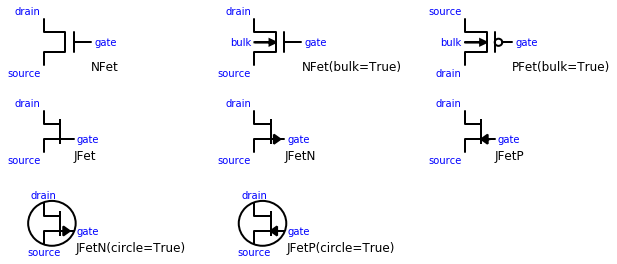

In [3]:
    elmlist = [NFet, partial(NFet, bulk=True), partial(PFet, bulk=True),
               JFet, JFetN, JFetP, partial(JFetN, circle=True), partial(JFetP, circle=True)]
    drawElements(elmlist, dx=6.5, dy=3, lblofst=[0, -.8])
